In [1]:
import pandas as pd

from optimizer import FW
from utils import process_dataset, plot_hisotry

# Using FW optimizer
In this notebook we show how to use FW optimizer on given instances.

## Run one variant

In [2]:
instance = "hamming6-2"
variant = "AFW"
SSC = True
stepsize_strategy = "backtracking"
tolerance = 1e-5
# linesearch parameter for backtracking
L = 0.01
tau = 1.5
nu = 1.0
seed = 1

In [3]:
n, hyperedges, complement_hyperedges = process_dataset(instance, 4)

fw = FW(variant=variant, 
        stepsize_strategy = stepsize_strategy, 
        ssc_procedure=SSC,
        linesearch_args={'L': L, 'tau': tau, 'nu': nu},
        tolerance=tolerance)
fw.optimize(complement_hyperedges, n, seed=seed)

In [4]:
# construct a dataframe
df = pd.DataFrame(fw.history)
df['Variant'] = pd.Series([fw.variant] * len(df))
df['seed'] = pd.Series([seed] * len(df))

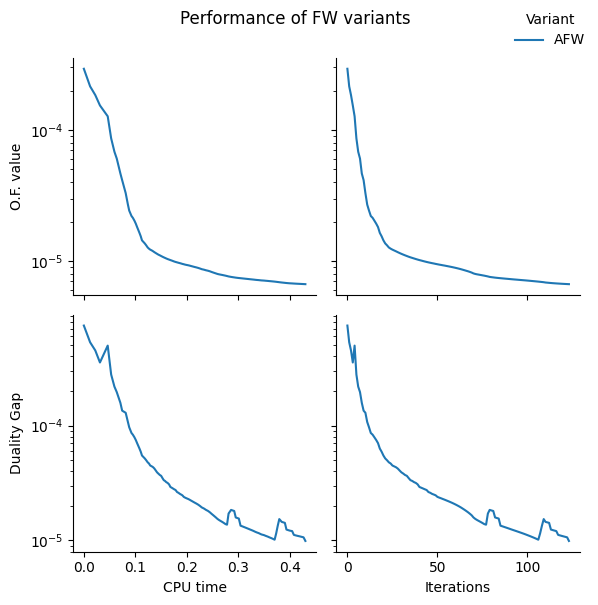

In [5]:
plot_hisotry(df, size=6)

## Run several variants

In [6]:
instance = "hamming6-2"
variants = ["AFW", "PFW", "BPFW"]
SSC = True
stepsize_strategy = "backtracking"
tolerance = 1e-5
# linesearch parameter for backtracking
L = 0.01
tau = 1.5
nu = 1.0
seed = 1

n, hyperedges, complement_hyperedges = process_dataset(instance, 4)

In [7]:
df = pd.DataFrame()
for variant in variants:
    fw = FW(variant=variant, 
            stepsize_strategy = stepsize_strategy,
            linesearch_args={'L': L, 'tau': tau, 'nu': nu},
            ssc_procedure=SSC,
            tolerance=tolerance)
    fw.optimize(complement_hyperedges, n, seed=seed)
    df1 = pd.DataFrame(fw.history)
    df1['Variant'] = pd.Series([fw.variant] * len(df1))
    df1['seed'] = pd.Series([seed] * len(df1))
    df = pd.concat([df, df1])

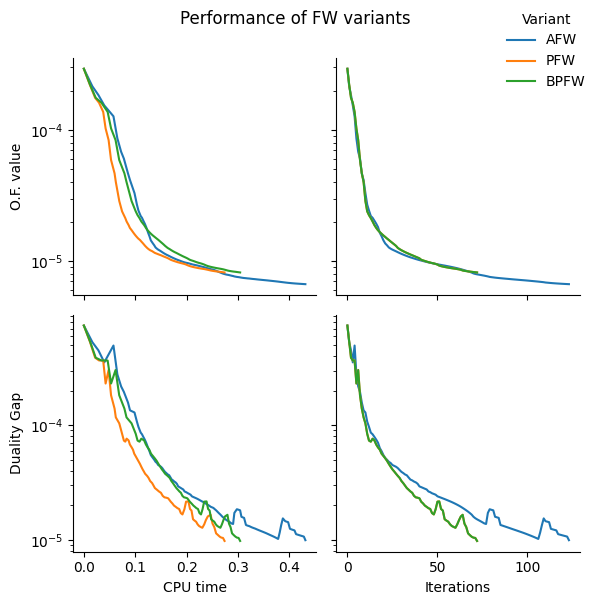

In [8]:
plot_hisotry(df, size=6)